-Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [657]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [658]:
pd.set_option('display.max_columns',None)
data = pd.read_excel("EastWestAirlines.xlsx")
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [659]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


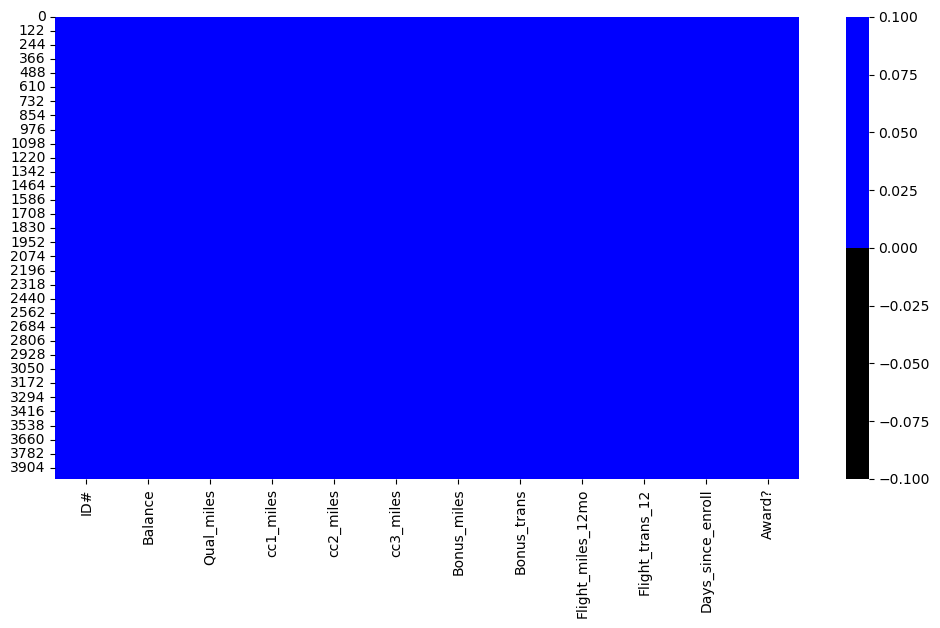

In [660]:
# Plot the heatmap to find more about Missing values

plt.figure(figsize=(12,6))
cols=data.columns
colors=['black','blue']

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colors))
plt.show();

In [661]:
data=data.rename(columns={'Award?': 'Award'})
data=data.drop(columns=['ID#'],axis=1)
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [662]:
# lets check count of four catagorical column
data.cc1_miles.value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [663]:
data.cc2_miles.value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

In [664]:
data.cc3_miles.value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

- From above it shows that Majority of customers earned 5000 miles with  credit card in the past 12 months.

In [665]:
data.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

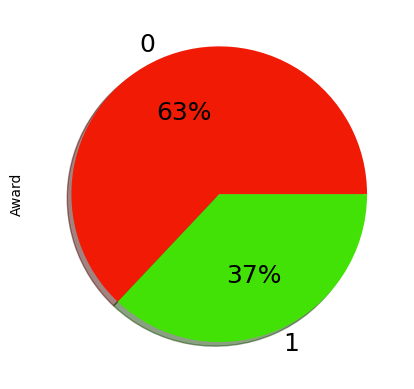

In [666]:
# Checking previously awarded miles ratio
data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show();

- Around 37% of customers got award flight (free flight)

In [667]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [668]:
# Our dataset consists of 4 categorical and 7 numeric variables

In [669]:
cat_list=['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award']
num_list=['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']

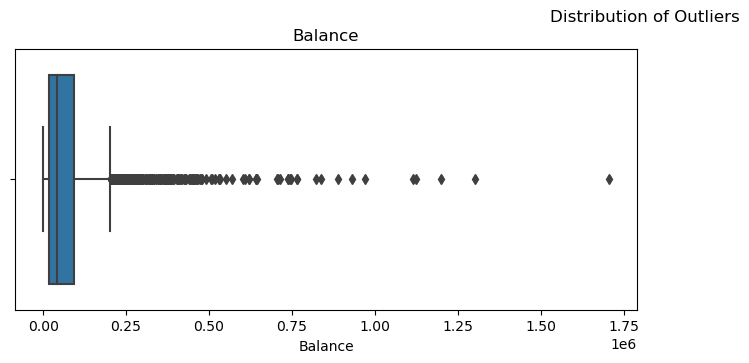

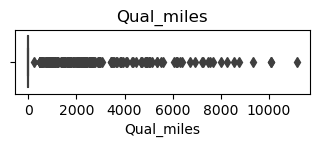

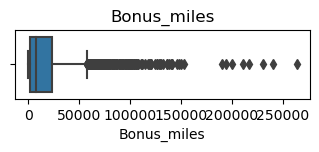

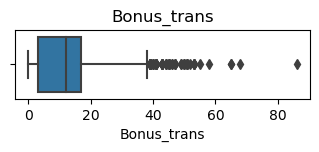

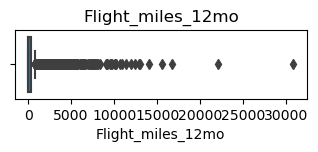

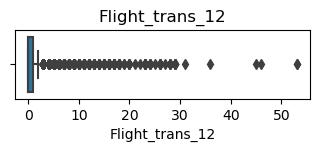

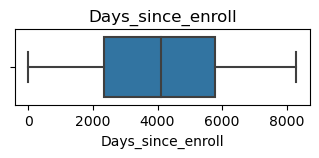

In [670]:
# lets check is their any outliers or not by boxplot

k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:       # all rows of num_list
    plt.subplot(4,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list])
    plt.title(i)
    
    #Adjust the padding between and around subplots.
    plt.tight_layout()
    k+=1
    plt.show();

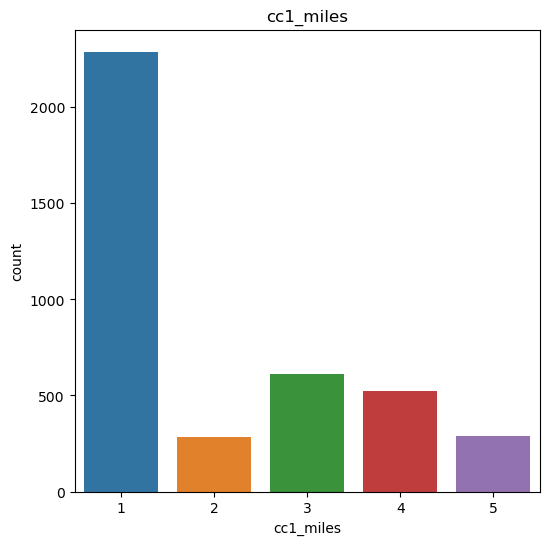

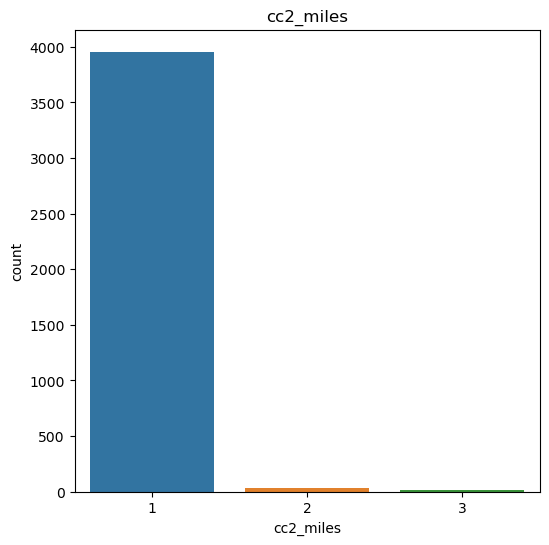

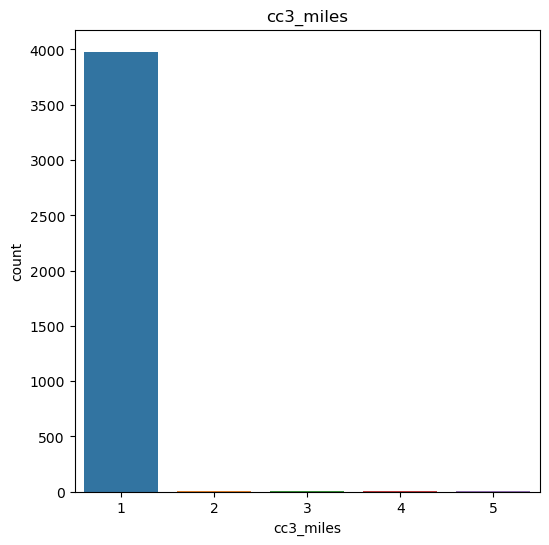

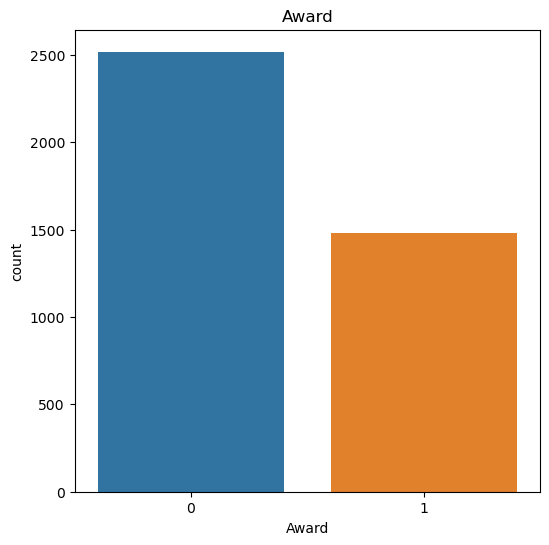

In [671]:
#Categorical Analysis

for i in cat_list:
    plt.figure(figsize=(6,6))
    sns.countplot(x = i, data =data.loc[:,cat_list])
    plt.title(i)
    plt.show();

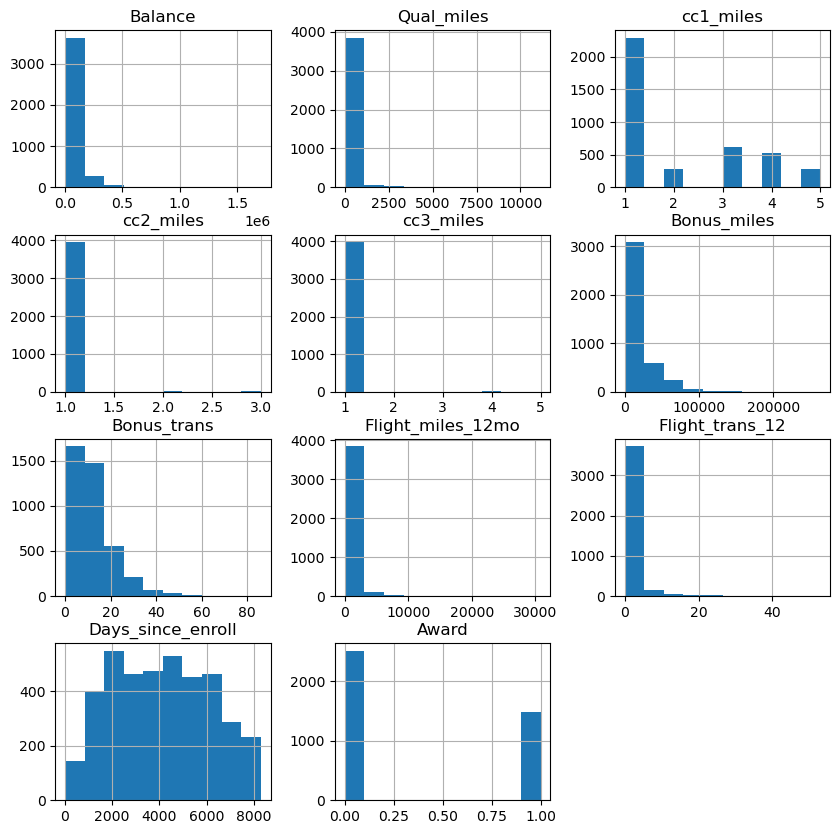

In [672]:
# histogram for checking skewness
data.hist(figsize=(10,10));
plt.show()

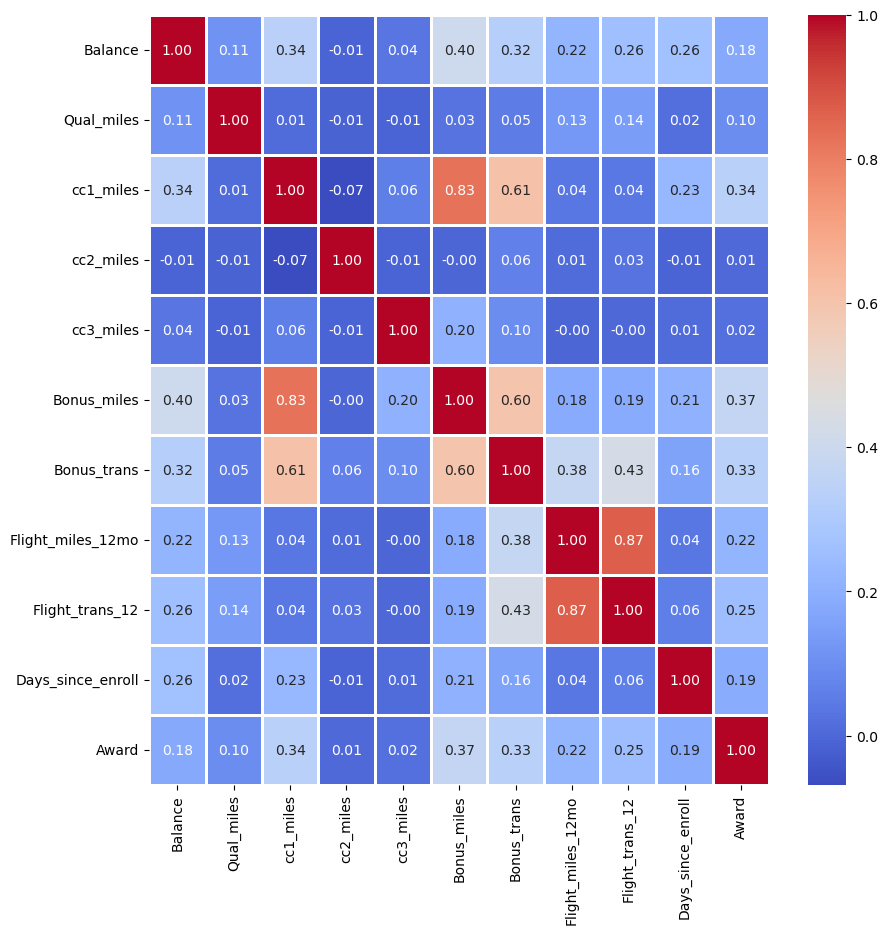

In [673]:
#corelation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

In [674]:
# Outlier Detection

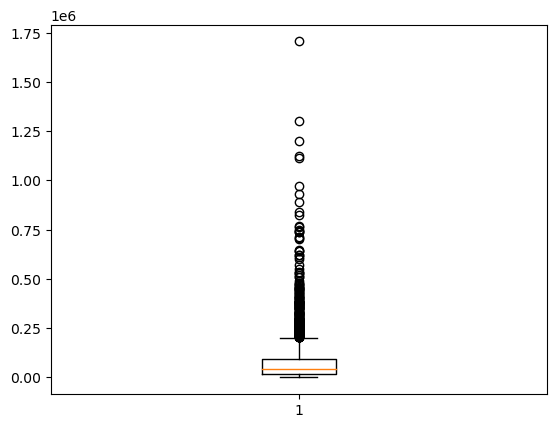

In [675]:
box=plt.boxplot(data['Balance'])
plt.show();

In [676]:
data['Balance'].mean()

73601.32758189547

In [677]:
Q11=data['Balance'].quantile(0.25)
Q33=data['Balance'].quantile(0.75)
IQR1=Q33-Q11
print(Q11)
print(Q33)
print(IQR1)
Lower_Whisker1 = Q11-1.5*IQR1
Upper_Whisker1 = Q33+1.5*IQR1
print(Lower_Whisker1, Upper_Whisker1)

18527.5
92404.0
73876.5
-92287.25 203218.75


In [678]:
# extracting outliers above upper whisker
data=data[data['Balance']<203218]

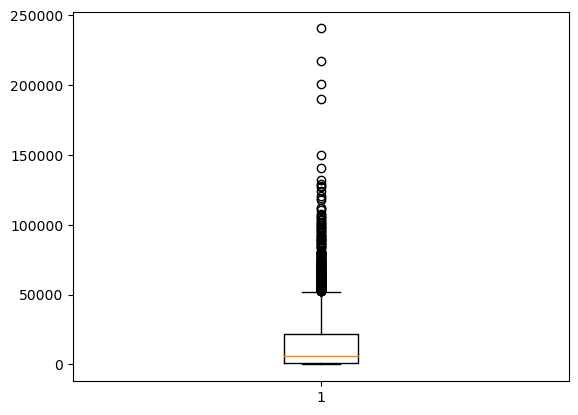

In [679]:
box=plt.boxplot(data['Bonus_miles'])
plt.show();

In [680]:
Q11=data['Bonus_miles'].quantile(0.25)
Q33=data['Bonus_miles'].quantile(0.75)
IQR1=Q33-Q11
print(Q11)
print(Q33)
print(IQR1)
Lower_Whisker1 = Q11-1.5*IQR1
Upper_Whisker1 = Q33+1.5*IQR1
print(Lower_Whisker1, Upper_Whisker1)

1100.0
21559.0
20459.0
-29588.5 52247.5


In [681]:
# extracting outliers above upper whisker
data=data[data['Bonus_miles']<52247]

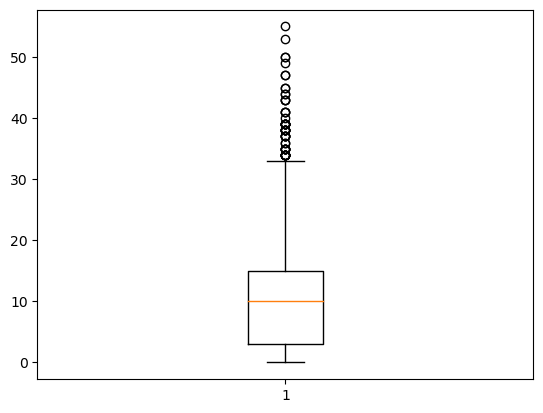

In [682]:
box=plt.boxplot(data['Bonus_trans'])
plt.show();

In [683]:
# extracting outliers above upper whisker
data=data[data['Bonus_trans']<35]

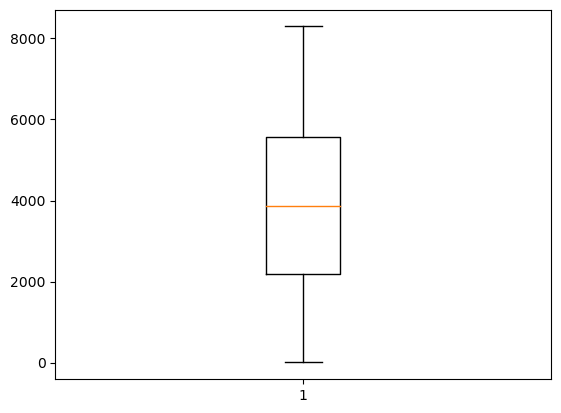

In [684]:
box=plt.boxplot(data['Days_since_enroll'])
plt.show();

- Its Normal distribution

In [685]:
# Treating skewness

In [686]:
data.skew()

Balance               1.266209
Qual_miles            8.227372
cc1_miles             1.005932
cc2_miles            11.321404
cc3_miles            37.260935
Bonus_miles           1.342015
Bonus_trans           0.516838
Flight_miles_12mo     6.637077
Flight_trans_12       5.049057
Days_since_enroll     0.191724
Award                 0.774441
dtype: float64

In [687]:
data.Balance=np.sqrt(data.Balance)

In [688]:
data.Bonus_miles=np.sqrt(data.Bonus_miles)

In [689]:
# Normalisation to reduced effect of Biased Problem
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data)
data1

array([[-0.3445336 , -0.16858308, -0.69295816, ..., -0.36386213,
         1.49339771, -0.68524013],
       [-0.64509001, -0.16858308, -0.69295816, ..., -0.36386213,
         1.47771875, -0.68524013],
       [ 0.02394779, -0.16858308, -0.69295816, ..., -0.36386213,
         1.5100566 , -0.68524013],
       ...,
       [ 0.72711084, -0.16858308,  1.10338648, ..., -0.36386213,
        -1.24943997,  1.45934244],
       [ 0.34430097, -0.16858308, -0.69295816, ...,  0.01457657,
        -1.24992993, -0.68524013],
       [-1.51256515, -0.16858308, -0.69295816, ..., -0.36386213,
        -1.25139984, -0.68524013]])

In [690]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [691]:
# converting Array output into dataframe
data1=pd.DataFrame(data1,columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'])
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.344534,-0.168583,-0.692958,-0.097106,-0.030889,-1.090573,-1.132183,-0.326637,-0.363862,1.493398,-0.685240
1,-0.645090,-0.168583,-0.692958,-0.097106,-0.030889,-1.067318,-1.002665,-0.326637,-0.363862,1.477719,-0.685240
2,0.023948,-0.168583,-0.692958,-0.097106,-0.030889,-0.284552,-0.743627,-0.326637,-0.363862,1.510057,-0.685240
3,-0.822780,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,-0.326637,-0.363862,1.469879,-0.685240
4,1.155292,-0.168583,2.001559,-0.097106,-0.030889,1.988435,2.105784,1.760762,1.149893,1.461550,1.459342
...,...,...,...,...,...,...,...,...,...,...,...
3422,-0.674035,-0.168583,-0.692958,-0.097106,-0.030889,0.159700,-0.743627,-0.125635,0.014577,-1.248950,1.459342
3423,0.545493,-0.168583,-0.692958,-0.097106,-0.030889,-0.804151,-0.614108,-0.326637,-0.363862,-1.252870,1.459342
3424,0.727111,-0.168583,1.103386,-0.097106,-0.030889,1.221188,-0.225552,-0.326637,-0.363862,-1.249440,1.459342
3425,0.344301,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,0.175867,0.014577,-1.249930,-0.685240


In [692]:
data_hie=data1

# Hierarchical Clustering

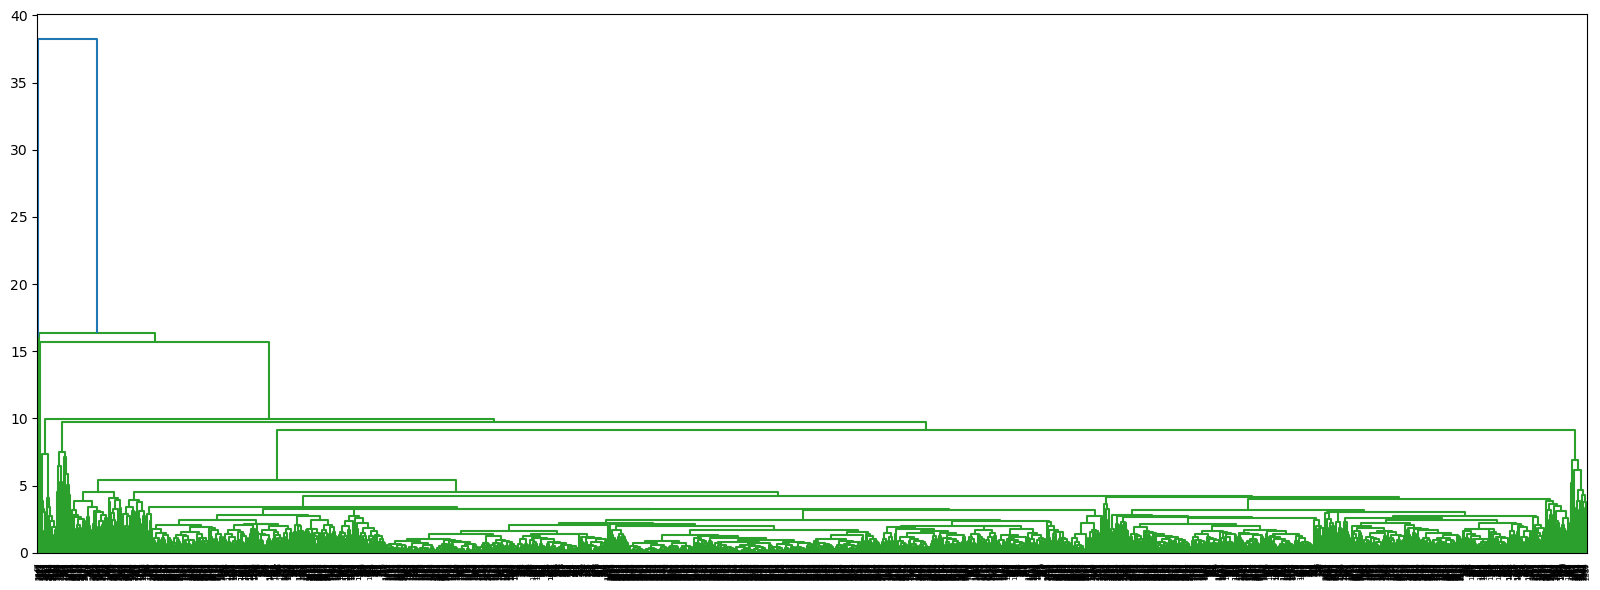

In [693]:
# create dendrogram
plt.figure(figsize=(20, 7))

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data1, method='average'))
plt.show();

In [717]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(data1)
y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [718]:
# Converting into dataframe 
Clusters_hie=pd.DataFrame(y_hc,columns=['Clusters_hie']) #dataframe making of array y_hc
Clusters_hie

,Clusters_hie
0,1
1,1
2,1
3,1
4,1
...,...
3422,1
3423,1
3424,1
3425,1


In [719]:
# Attaching state and new created cluster_hie column into dataframe
data_hie=pd.concat([data,Clusters_hie],axis=1)
data_hie.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hie
0,167.758755,0.0,1.0,1.0,1.0,13.190906,1.0,0.0,0.0,7000.0,0.0,1.0
1,138.722745,0.0,1.0,1.0,1.0,14.662878,2.0,0.0,0.0,6968.0,0.0,1.0
2,203.356829,0.0,1.0,1.0,1.0,64.210591,4.0,0.0,0.0,7034.0,0.0,1.0
3,121.556571,0.0,1.0,1.0,1.0,22.360680,1.0,0.0,0.0,6952.0,0.0,1.0
4,312.653162,0.0,4.0,1.0,1.0,208.086520,26.0,2077.0,4.0,6935.0,1.0,1.0


In [720]:
data_hie['Clusters_hie'].unique()

array([ 1.,  2.,  0., nan])

In [721]:
data_hie.dropna(inplace=True)

In [722]:
data_hie.groupby('Clusters_hie').agg(['mean']).reset_index()

,Clusters_hie,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0.0,159.110025,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,3258.000000,0.000000
1,1.0,211.288003,132.166725,1.841959,1.014241,1.002431,86.173703,10.067385,331.622091,1.01042,4454.415769,0.348732
2,2.0,220.356984,0.000000,1.666667,1.000000,1.000000,82.143018,12.666667,0.000000,0.00000,3997.333333,0.000000


In [723]:
#checking silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data1,y_hc )

0.7567187635477203

In [724]:
#States in cluster #1 
data_hie[data_hie['Clusters_hie']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hie
0,167.758755,0.0,1.0,1.0,1.0,13.190906,1.0,0.0,0.0,7000.0,0.0,1.0
1,138.722745,0.0,1.0,1.0,1.0,14.662878,2.0,0.0,0.0,6968.0,0.0,1.0
2,203.356829,0.0,1.0,1.0,1.0,64.210591,4.0,0.0,0.0,7034.0,0.0,1.0
3,121.556571,0.0,1.0,1.0,1.0,22.360680,1.0,0.0,0.0,6952.0,0.0,1.0
4,312.653162,0.0,4.0,1.0,1.0,208.086520,26.0,2077.0,4.0,6935.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3422,261.135980,0.0,1.0,1.0,1.0,36.055513,9.0,1300.0,9.0,1640.0,0.0,1.0
3423,147.020407,0.0,1.0,1.0,1.0,71.014083,13.0,1000.0,2.0,1069.0,0.0,1.0
3424,191.908833,0.0,4.0,1.0,1.0,206.148005,19.0,1001.0,1.0,1015.0,1.0,1.0
3425,390.099987,0.0,4.0,1.0,1.0,199.399097,15.0,248.0,1.0,1073.0,0.0,1.0


In [725]:
#States in cluster #0 
data_hie[data_hie['Clusters_hie']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hie
2447,159.110025,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3258.0,0.0,0.0


In [726]:
#States in cluster #0 
data_hie[data_hie['Clusters_hie']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_hie
1260,242.132195,0.0,3.0,1.0,1.0,150.269757,13.0,0.0,0.0,5471.0,0.0,2.0
1502,191.481070,0.0,1.0,1.0,1.0,40.311289,6.0,0.0,0.0,4747.0,0.0,2.0
2917,227.457688,0.0,1.0,1.0,1.0,55.848008,19.0,0.0,0.0,1774.0,0.0,2.0


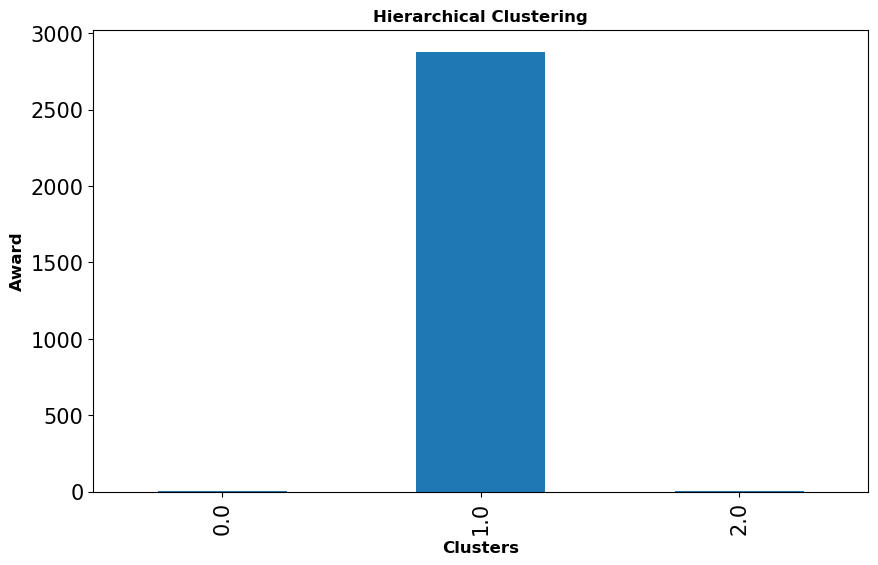

In [727]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data_hie.groupby(['Clusters_hie']).count()['Award'].plot(kind='bar')
plt.ylabel('Award')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Award', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# kmeans

In [728]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.344534,-0.168583,-0.692958,-0.097106,-0.030889,-1.090573,-1.132183,-0.326637,-0.363862,1.493398,-0.685240
1,-0.645090,-0.168583,-0.692958,-0.097106,-0.030889,-1.067318,-1.002665,-0.326637,-0.363862,1.477719,-0.685240
2,0.023948,-0.168583,-0.692958,-0.097106,-0.030889,-0.284552,-0.743627,-0.326637,-0.363862,1.510057,-0.685240
3,-0.822780,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,-0.326637,-0.363862,1.469879,-0.685240
4,1.155292,-0.168583,2.001559,-0.097106,-0.030889,1.988435,2.105784,1.760762,1.149893,1.461550,1.459342
...,...,...,...,...,...,...,...,...,...,...,...
3422,-0.674035,-0.168583,-0.692958,-0.097106,-0.030889,0.159700,-0.743627,-0.125635,0.014577,-1.248950,1.459342
3423,0.545493,-0.168583,-0.692958,-0.097106,-0.030889,-0.804151,-0.614108,-0.326637,-0.363862,-1.252870,1.459342
3424,0.727111,-0.168583,1.103386,-0.097106,-0.030889,1.221188,-0.225552,-0.326637,-0.363862,-1.249440,1.459342
3425,0.344301,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,0.175867,0.014577,-1.249930,-0.685240


In [729]:
# importing kmeans library
from sklearn.cluster import KMeans

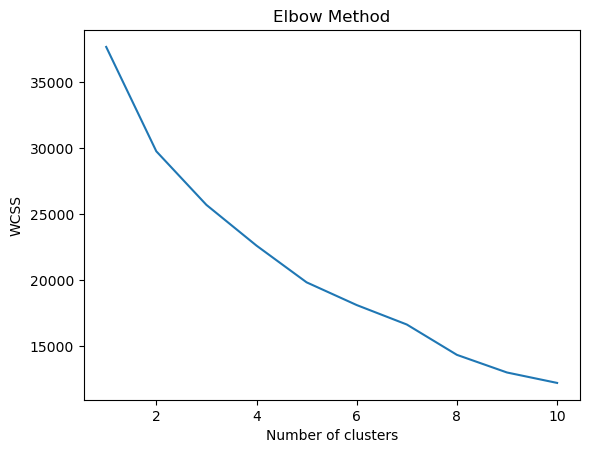

In [730]:
# draw Elbow chart to identify right cluster count

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)    
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)    

# for ploting    
plt.plot(range(1, 11), wcss)        
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [731]:
# check all attributes of kmeans clustering
kmeans.inertia_

12185.529544459896

In [732]:
wcss

[37696.99999999999,
 29773.59205946912,
 25704.055655297016,
 22611.05405866741,
 19822.61738094545,
 18097.62651950927,
 16620.513641449572,
 14316.925787357894,
 12976.880988886007,
 12185.529544459896]

In [733]:
kmeans.cluster_centers_

array([[-2.32445064e-01, -1.30593450e-01, -6.55113821e-01,
        -9.71060776e-02, -3.08889002e-02, -7.25085001e-01,
        -6.13198855e-01, -2.22753869e-01, -2.25136707e-01,
         7.87333998e-01, -6.85240126e-01],
       [-6.27398796e-01, -1.21622401e-01, -6.64347438e-01,
        -9.71060776e-02, -3.08889002e-02, -7.66132763e-01,
        -6.19118221e-01, -2.48352364e-01, -2.57089891e-01,
        -9.83533137e-01, -6.85240126e-01],
       [ 3.00207293e-01, -7.99901148e-02,  1.50558011e+00,
        -9.71060776e-02, -3.08889002e-02,  1.31648088e+00,
         9.70545185e-01, -8.16651674e-02, -9.86510725e-02,
         2.96002906e-01,  1.45934244e+00],
       [-2.11241860e-01, -3.76857789e-02, -5.49799690e-01,
        -9.71060776e-02, -3.08889002e-02, -2.51989039e-01,
        -3.55070982e-01, -1.00564910e-01, -6.63993956e-02,
         1.12366738e-01,  1.45934244e+00],
       [-1.53637854e-01, -1.68583085e-01, -6.92958160e-01,
         9.14685303e+00, -3.08889002e-02,  3.67033036e-01,
  

In [743]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(data1)

KMeans(n_clusters=3, random_state=42)

In [744]:
yc=clusters_new.labels_
yc

array([0, 0, 0, ..., 1, 0, 0])

In [745]:
# Converting into dataframe 
Clusters_kmean=pd.DataFrame(yc,columns=['Clusters_kmean']) 
Clusters_kmean

,Clusters_kmean
0,0
1,0
2,0
3,0
4,1
...,...
3422,0
3423,0
3424,1
3425,0


In [746]:
# concanating dataframe with new column
data_kmean=pd.concat([data1,Clusters_kmean],axis=1)
data_kmean

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_kmean
0,-0.344534,-0.168583,-0.692958,-0.097106,-0.030889,-1.090573,-1.132183,-0.326637,-0.363862,1.493398,-0.685240,0
1,-0.645090,-0.168583,-0.692958,-0.097106,-0.030889,-1.067318,-1.002665,-0.326637,-0.363862,1.477719,-0.685240,0
2,0.023948,-0.168583,-0.692958,-0.097106,-0.030889,-0.284552,-0.743627,-0.326637,-0.363862,1.510057,-0.685240,0
3,-0.822780,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,-0.326637,-0.363862,1.469879,-0.685240,0
4,1.155292,-0.168583,2.001559,-0.097106,-0.030889,1.988435,2.105784,1.760762,1.149893,1.461550,1.459342,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3422,-0.674035,-0.168583,-0.692958,-0.097106,-0.030889,0.159700,-0.743627,-0.125635,0.014577,-1.248950,1.459342,0
3423,0.545493,-0.168583,-0.692958,-0.097106,-0.030889,-0.804151,-0.614108,-0.326637,-0.363862,-1.252870,1.459342,0
3424,0.727111,-0.168583,1.103386,-0.097106,-0.030889,1.221188,-0.225552,-0.326637,-0.363862,-1.249440,1.459342,1
3425,0.344301,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,0.175867,0.014577,-1.249930,-0.685240,0


In [747]:
# check unique value for clusters
data_kmean['Clusters_kmean'].unique()

array([0, 1, 2])

In [748]:
data_kmean.groupby(['Clusters_kmean']).agg(['mean']).reset_index()

,Clusters_kmean,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,-0.401013,-0.052566,-0.653449,0.029031,-0.030889,-0.657994,-0.572835,-0.188410,-0.189070,-0.173992,-0.298461
1,1,0.595359,0.029723,1.143812,-0.063760,0.030986,1.053382,0.845256,-0.128699,-0.147390,0.288275,0.406356
2,2,0.584550,0.447973,-0.382270,0.116462,0.159329,0.371205,0.874949,3.413568,3.565712,0.023372,0.717506


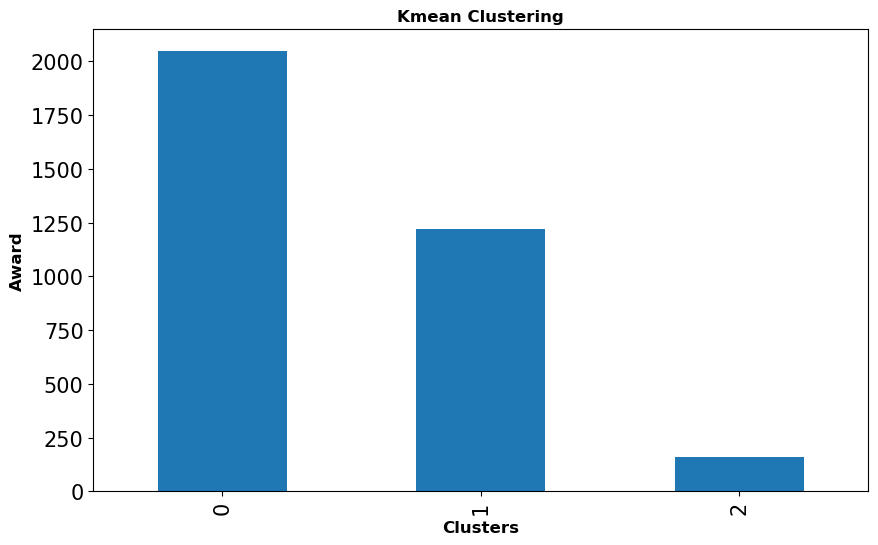

In [749]:
# Plotting barplot using groupby method to get visualization of  states count  in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data_kmean.groupby(['Clusters_kmean']).count()['Award'].plot(kind='bar')

plt.title('Kmean Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Award', fontsize='large', fontweight='bold')

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show();

In [750]:
#checking silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data1,yc )

0.3124485185439455

# DBSCAN

In [807]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.344534,-0.168583,-0.692958,-0.097106,-0.030889,-1.090573,-1.132183,-0.326637,-0.363862,1.493398,-0.685240
1,-0.645090,-0.168583,-0.692958,-0.097106,-0.030889,-1.067318,-1.002665,-0.326637,-0.363862,1.477719,-0.685240
2,0.023948,-0.168583,-0.692958,-0.097106,-0.030889,-0.284552,-0.743627,-0.326637,-0.363862,1.510057,-0.685240
3,-0.822780,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,-0.326637,-0.363862,1.469879,-0.685240
4,1.155292,-0.168583,2.001559,-0.097106,-0.030889,1.988435,2.105784,1.760762,1.149893,1.461550,1.459342
...,...,...,...,...,...,...,...,...,...,...,...
3422,-0.674035,-0.168583,-0.692958,-0.097106,-0.030889,0.159700,-0.743627,-0.125635,0.014577,-1.248950,1.459342
3423,0.545493,-0.168583,-0.692958,-0.097106,-0.030889,-0.804151,-0.614108,-0.326637,-0.363862,-1.252870,1.459342
3424,0.727111,-0.168583,1.103386,-0.097106,-0.030889,1.221188,-0.225552,-0.326637,-0.363862,-1.249440,1.459342
3425,0.344301,-0.168583,-0.692958,-0.097106,-0.030889,-0.945707,-1.132183,0.175867,0.014577,-1.249930,-0.685240


In [808]:
# making clusters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.4, min_samples=12)
dbscan.fit(data1)
dbscan.labels_  

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [809]:
# converting into dataframe
c1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3422,1
3423,1
3424,1
3425,0


In [810]:
# concanating this new cluster into dataframe
clustered = pd.concat([data1,c1],axis=1)

In [811]:
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
18,2.379358,2.551330,-0.692958,-0.097106,-0.030889,0.522976,0.810597,1.482375,3.042086,1.442441,1.459342,-1
19,-0.595937,-0.168583,-0.692958,-0.097106,-0.030889,-0.371029,0.163004,3.140636,3.798964,1.436561,-0.685240,-1
30,1.560445,-0.168583,2.001559,-0.097106,-0.030889,2.253777,1.717228,2.185880,1.528331,1.917220,1.459342,-1
37,0.461080,-0.168583,-0.692958,-0.097106,-0.030889,0.280858,2.105784,2.939635,3.042086,1.899581,1.459342,-1
43,1.322864,-0.168583,-0.692958,-0.097106,-0.030889,-0.038270,-0.614108,6.073246,1.528331,1.416963,-0.685240,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.366794,2.885944,-0.692958,-0.097106,-0.030889,0.123227,1.199154,3.797911,5.691157,-1.175945,-0.685240,-1
3363,0.783735,-0.168583,-0.692958,-0.097106,-0.030889,0.325797,-1.002665,9.298312,0.014577,-1.194074,-0.685240,-1
3379,0.447069,-0.168583,-0.692958,-0.097106,-0.030889,-0.176290,0.810597,3.643140,4.555841,-1.213182,-0.685240,-1
3388,-0.858805,-0.168583,-0.692958,6.694374,-0.030889,-0.093528,0.292523,-0.326637,-0.363862,-1.222002,-0.685240,-1


In [812]:
clustered[clustered['cluster']==-1].shape           # -1 cluster is Noise Cluster

(339, 12)

In [813]:
# now check how good is selected cluster numbers by silhoutte score

from sklearn.metrics import silhouette_score
silhouette_score(data1,dbscan.labels_ )

0.21059094520474428